# Airbnb Hotel Booking Analysis

## **Problem Statement**

Airbnb Hotel Booking Analysis.
The hospitality industry has undergone a significant transformation with the rise of online platforms facilitating short-term lodging and tourism.
Leading this revolution is Airbnb, Inc., a pioneering American company that has reshaped travel accommodation through its innovative online marketplace. Established in 2008 in San Francisco, California, Airbnb provides a diverse range of lodging options, offering guests a unique and personalized experience. Unlike traditional hospitality providers, Airbnb operates on a commission-based model, facilitating transactions between hosts and guests without owning the properties listed on its platform.
This research analysis delves into the New York City Airbnb dataset to extract meaningful insights. Through rigorous data cleaning, exploratory analysis, and visualization techniques, the study aims to illuminate the dynamics of the city's lodging market. By discerning factors influencing listing availability, pricing strategies, and overall customer satisfaction, the research contributes to a deeper understanding of Airbnb's operations in one of the world's most dynamic urban environments. These insights hold significance for stakeholders and enthusiasts seeking to navigate the evolving landscape of short-term accommodation.


## **QUESTIONS**

This project is aimed to uncover some insights from the Airbnb Open Data. The following questions would be answered from the data.
1. What are the different property types in the Dataset?
2. Which neighborhood group has the highest number of listings?
3. Which neighborhoods group have the highest average prices for Airbnb listings?
4. Is there a relationship between the construction year of property and price?
5. Who are the top 10 hosts by calculated host listing count?
6. Are hosts with verified identities more likely to receive positive reviews?
7. Is there a correlation between the price of a listing and its service fee?
8. What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?
9. Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

## Data Wrangling



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# read the data
df = pd.read_excel('Airbnb_Open_Data.xlsx', )

In [4]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [7]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [8]:
# cleaning the data


In [9]:
# drop duplicate records
df.drop_duplicates(inplace=True)

In [10]:
df.drop(['house_rules', 'license'], inplace=True, axis=1)

In [14]:
# remove all $ sign from prices
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False).astype(float)
df['service fee'] = df['service fee'].astype(str).str.replace('$', '', regex=False).astype(float)

In [15]:
# remove all commas
df['price'] = df['price'].astype(str).str.replace(',', '', regex=False).astype(float)
df['service fee'] = df['service fee'].astype(str).str.replace(',', '', regex=False).astype(float)

In [16]:
# rename the price and service column to include a dollar sign
df.rename(columns={'price': 'price_$', 'service fee': 'service_fee_$'}, inplace=True)


In [17]:
# drop all records with missing value
df.dropna(inplace=True)

In [18]:
# change all mismatched data types to the appropriate once
df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

In [19]:
# correct the spelling brookln to brooklyn
df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'

In [20]:
# get rid of outliers in the 'availability 365' column data
df = df.drop(df[df['availability 365'] > 500].index)

In [21]:
df.duplicated().value_counts()

,count
False,83389


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83389 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83389 non-null  object        
 1   NAME                            83389 non-null  object        
 2   host id                         83389 non-null  object        
 3   host_identity_verified          83389 non-null  object        
 4   host name                       83389 non-null  object        
 5   neighbourhood group             83389 non-null  object        
 6   neighbourhood                   83389 non-null  object        
 7   lat                             83389 non-null  float64       
 8   long                            83389 non-null  float64       
 9   country                         83389 non-null  object        
 10  country code                    83389 non-null  object        
 11  instan

In [23]:
# EDA - Exploratory Data Analysis

In [24]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389,83389.000000,83389.000000,83389.000000,83389.000000
mean,40.727349,-73.948502,0.497704,2012.487810,626.209668,125.243114,7.406109,32.261305,2019-06-08 21:32:53.396971008,1.377352,3.278694,7.032894,141.746369
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687640,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-25 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762600,-73.930800,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056326,0.050342,0.499998,5.760526,331.803443,66.364212,28.105563,51.954290,NaN,1.751091,1.283678,29.555458,133.377544


In [26]:
# what are the diff types in the dataset
property_type = df['room type'].value_counts().to_frame()
property_type

,count
room type,
Entire home/apt,44161
Private room,37474
Shared room,1646
Hotel room,108


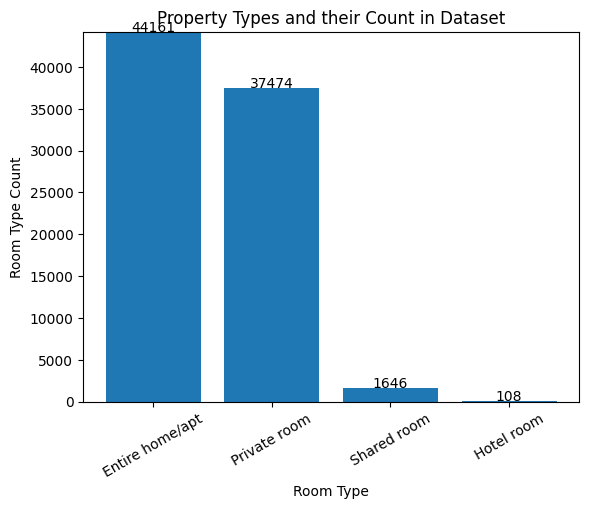

In [49]:
# room type count plotted on barchart
room_type_bar = plt.bar(property_type.index, property_type['count'])
plt.bar_label(room_type_bar, labels=property_type['count'], padding=-2)
plt.ylim([0, property_type['count'].max() + 10])
plt.title('Property Types and their Count in Dataset')
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.xticks(rotation=30)
plt.show()


In [35]:
# which neighbourhood group has the highest number of listing?

In [36]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34622
Manhattan,34560
Queens,11124
Bronx,2267
Staten Island,816


(0.0, 34632.0)

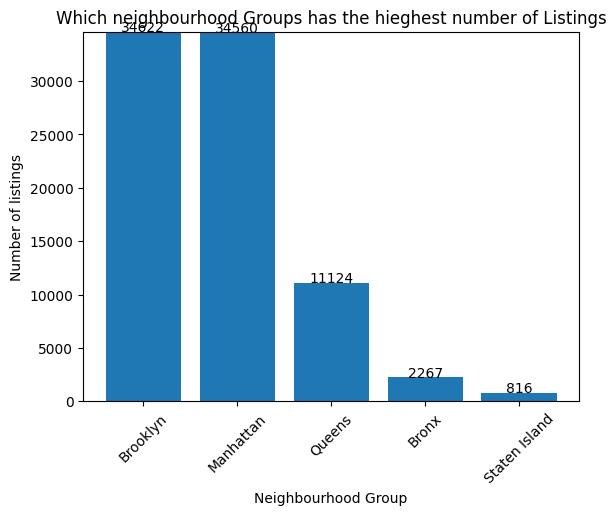

In [53]:
# plot this
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,'count'])
plt.bar_label(hood_group_bar, labels=hood_group.loc[:,'count'], padding=-2)
plt.title('Which neighbourhood Groups has the hieghest number of Listings')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of listings')
plt.xticks(rotation=45)
plt.ylim([0, hood_group['count'].max() + 10])

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Queens'),
  Text(1, 0, 'Bronx'),
  Text(2, 0, 'Brooklyn'),
  Text(3, 0, 'Manhattan'),
  Text(4, 0, 'Staten Island')])

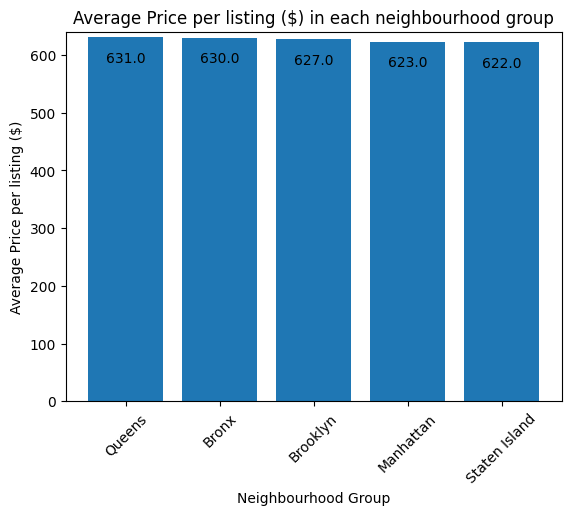

In [58]:
# Which neighbourhood group have the highest average price for Airnb listing?
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:,'price_$'])
plt.bar_label(avg_price_bar, labels=round(avg_price.loc[:,'price_$']), label_type='edge', padding=-20)
plt.ylim([0, avg_price['price_$'].max() + 10])
plt.title('Average Price per listing ($) in each neighbourhood group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price per listing ($)')
plt.xticks(rotation=45)

In [59]:
# Is there a relationship between the construction year of property and price?

Text(0.5, 1.0, 'Average Price ($) for each propertis in Construction Year')

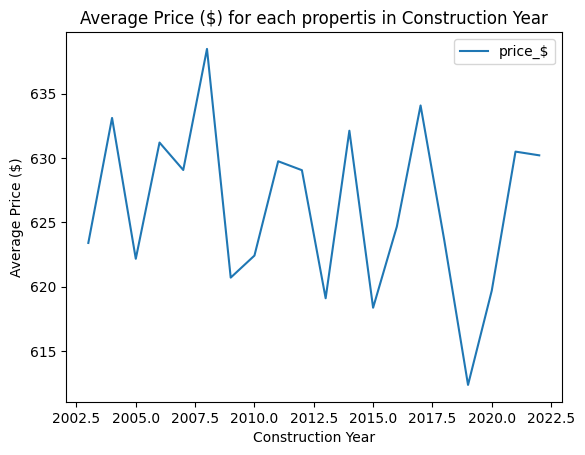

In [61]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot()
plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')
plt.title('Average Price ($) for each propertis in Construction Year')

In [62]:
# Who are the top 10 hosts by calculated host listing count?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sonder (NYC)'),
  Text(1, 0, 'Karen'),
  Text(2, 0, 'Jeniffer'),
  Text(3, 0, 'Blueground'),
  Text(4, 0, 'Kaz'),
  Text(5, 0, 'Corporate Housing'),
  Text(6, 0, 'Soya'),
  Text(7, 0, 'Stay With Vibe'),
  Text(8, 0, 'Kara'),
  Text(9, 0, 'Jeremy & Laura')])

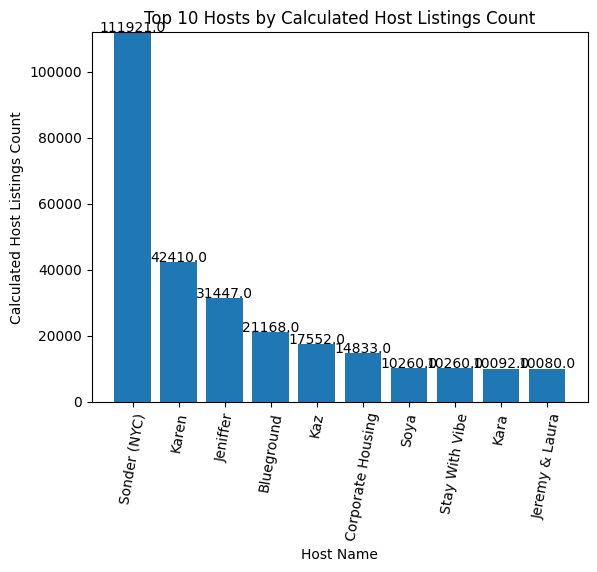

In [66]:
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:,'calculated host listings count'])
plt.bar_label(hosts_bar, labels=hosts.loc[:,'calculated host listings count'], padding=-2, label_type='edge')
plt.ylim([0, hosts['calculated host listings count'].max() + 10])
plt.title('Top 10 Hosts by Calculated Host Listings Count')
plt.xlabel('Host Name')
plt.ylabel('Calculated Host Listings Count')
plt.xticks(rotation=80)

In [67]:
# Are hosts with varified indetites more likely to recieve positive reviews?

In [71]:
review = df.groupby('host_identity_verified')['review rate number'].mean().to_frame()
review

,review rate number
host_identity_verified,
unconfirmed,3.273325
verified,3.284066


Text(0.5, 1.0, 'Average Review Rate for Verification Statitics')

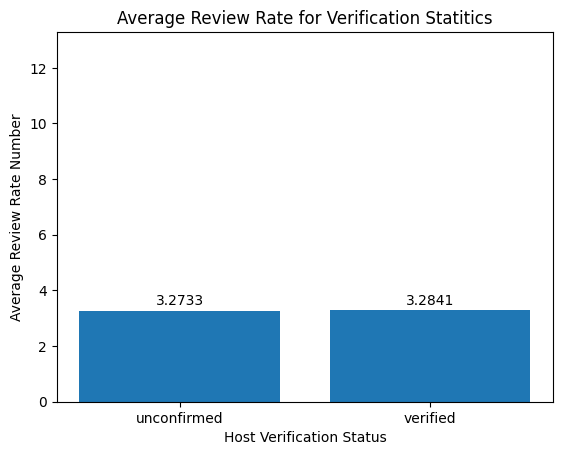

In [73]:
review_bar = plt.bar(review.index, review.loc[:,'review rate number'])
plt.bar_label(review_bar, labels=round(review.loc[:,'review rate number'],4), padding=2)
plt.ylim([0, review['review rate number'].max() + 10])
plt.ylabel('Average Review Rate Number')
plt.xlabel('Host Verification Status')
plt.title('Average Review Rate for Verification Statitics')

Text(0, 0.5, 'Average Review Rate Number')

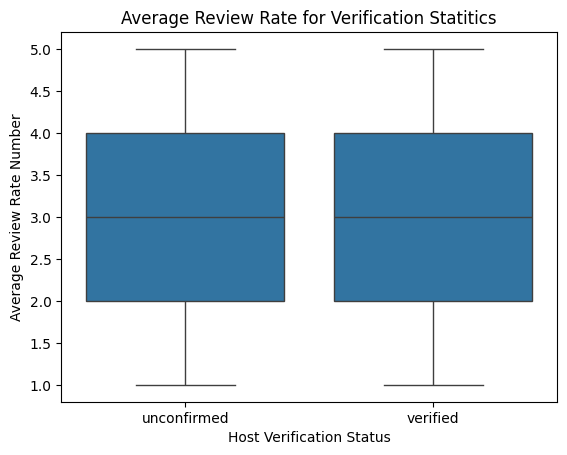

In [75]:
base_color = sns.color_palette()[0]
sns.boxplot(data=df, x='host_identity_verified', y='review rate number', color=base_color)
plt.title('Average Review Rate for each Verification Status')
plt.xlabel('Host Verification Status')
plt.ylabel('Average Review Rate Number')

In [76]:
# Is there a correlation b/w price of listing and its service fee?

In [77]:
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999909082976466)

Text(0, 0.5, 'Service Fee ($)')

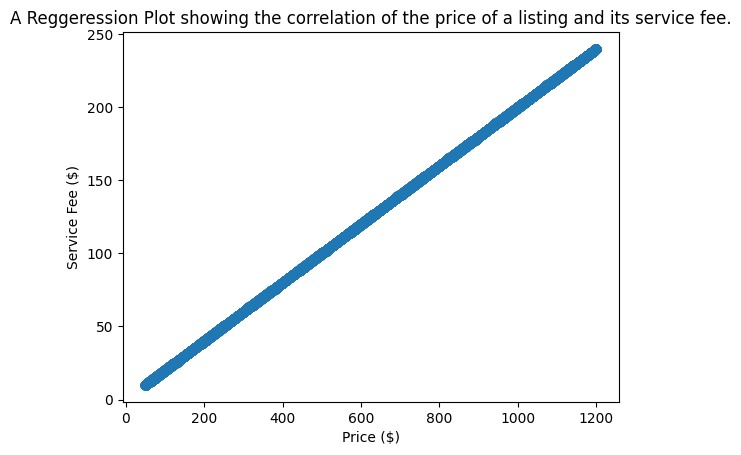

In [79]:
sns.regplot(data=df, x='price_$', y='service_fee_$')
plt.title('A Reggeression Plot showing the correlation of the price of a listing and its service fee.')
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')

In [80]:
# What is the average review rate number (eg. stars) for listings, and does it very based on the neighbourhood group and room type?

In [81]:
ARNN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARNN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274773
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285431
                    Shared room                3.261976
Queens              Entire home/apt            3.349528
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286

Text(0, 0.5, 'Average Review Rate')

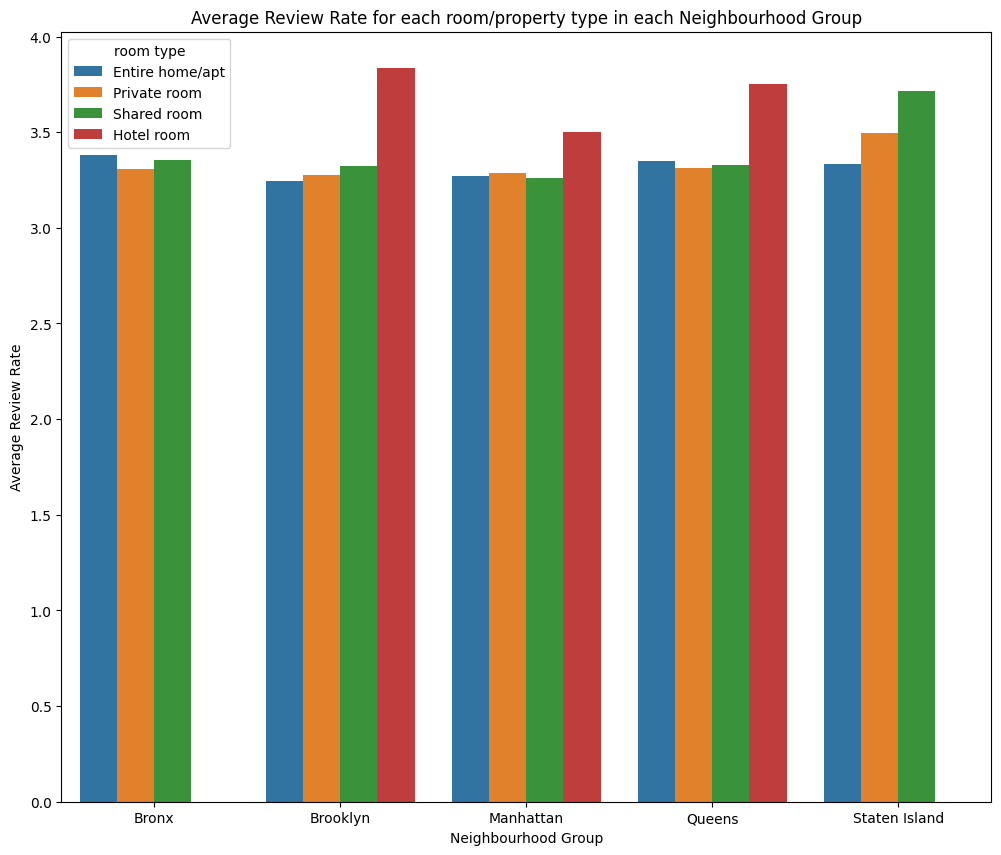

In [84]:
plt.figure(figsize=(12, 10))
sns.barplot(data=ARNN, x='neighbourhood group', y='review rate number', hue='room type')
plt.title('Average Review Rate for each room/property type in each Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate')

Text(0, 0.5, 'Average Review Rate')

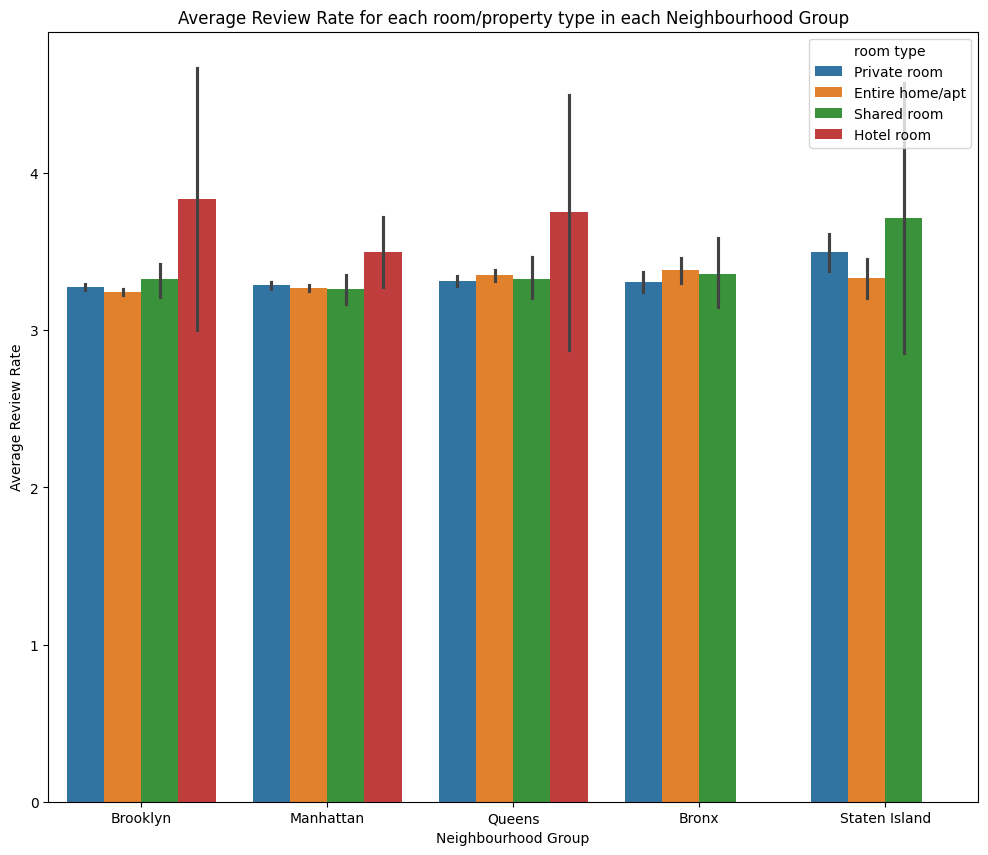

In [86]:
plt.figure(figsize=(12, 10))
sns.barplot(data=df, x='neighbourhood group', y='review rate number', hue='room type')
plt.title('Average Review Rate for each room/property type in each Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate')

In [87]:
# Are hosts with a higher calculated host listings count more likely to maintain heigher availibility throughout the year?

Text(0.5, 1.0, 'A Reggression Plot of the Relationship between calculated Host Listing Count and Availibility 365')

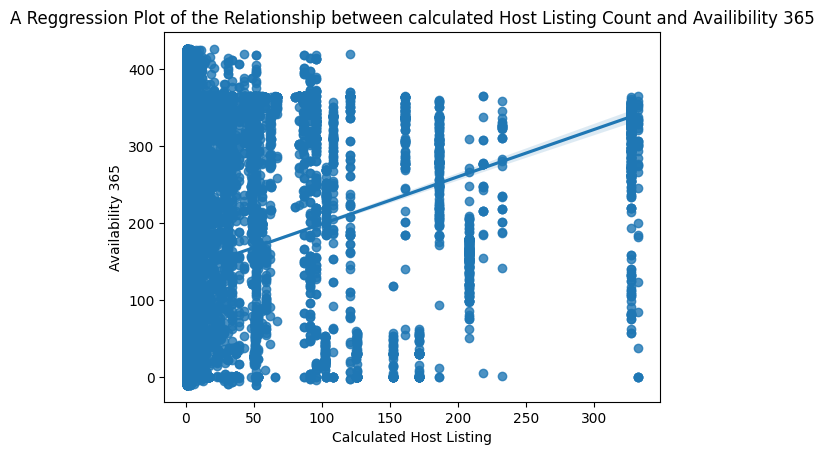

In [91]:
sns.regplot(df, x='calculated host listings count', y='availability 365')
plt.xlabel('Calculated Host Listing')
plt.ylabel('Availability 365')
plt.title('A Reggression Plot of the Relationship between calculated Host Listing Count and Availibility 365')

In [92]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.1359971471570339)

# **Conclusion**
In conclusion, this project has provided a comprehensive analysis of the New York City Airbnb dataset, shedding light on various aspects of the short-term lodging market. Through data wrangling, exploratory data analysis (EDA), and interpretation of summary statistics, we've uncovered valuable insights into listing distribution, pricing dynamics, host, and review analysis.
Key findings include the dominance in counts of Entire home/apt listings, the variability in listing counts across neighborhood groups, and the downward trend between property construction year and price. Additionally, the analysis highlighted the significance of verified host status on review rates, as well as the strong correlation between listing price and service fee.
Furthermore, conducting sentiment analysis on guest reviews to understand factors driving customer satisfaction and preferences could inform targeted marketing strategies and product improvements for Airbb. Lastly, expanding the analysis to include predictive modeling techniques, such as regression or machine learning algorithms, could enable forecasting of listing demand, pricing trends, and customer behavior, facilitating strategic decision-making for stakeholders in the short-term lodging industry.